In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
import random

In [28]:
# Force on a by b
def fab(a,b,k,n):
    x=a-b
    r=(x[0]**2 + x[1]**2)**(1/2)
    f= -1*k*r**n
    fv=f*x/r
    return fv

# Initialize the values

n=-2
# no.  of bodies
nb=5

posns=[]
vels=[]
masses=[]
radii=[]
for i in range(0,nb):
    posns.append(np.array([random.uniform(-8,8),random.uniform(-8,8)]))
    vels.append(np.array([random.uniform(-1.1,1.1),random.uniform(-0.5,0.7)]))
    masses.append(random.uniform(5,10))
    radii.append(random.uniform(0.01,0.05))


print("Intitial Conditions \n Positions {} \n Velocities {} \n Masses {} \n Radii {}".format(posns,vels,masses,radii))
t,delt,t_max=0,0.001,20

 
# lists keeping records
ts=[]
rec_posns=[[] for _ in range(0,nb)]
rec_vels=[[] for _ in range(0,nb)]
rec_rad=[[] for _ in range(0,nb)]
Rs=[]

tot_mass=sum(masses)
while t<t_max:
    
    # running loop for  every single particle
    for i in range(0,nb):
        
        # first check if the body exists or had been eaten
        if masses[i]==0:
            rec_posns[i].append(posns[i].copy())
            rec_vels[i].append(np.array([0.0,0.0]))
            rec_rad[i].append(0.0)
            continue
        
        # updating posn
        posns[i] += vels[i]*delt
        
        # net force on a single paricle
        net_f=np.array([0.0,0.0])
        for j in range(0,nb):
            radi=radii[i]
            radj=radii[j]
            
            if i==j:
                continue
                
            elif radi+radj >= np.linalg.norm(posns[i]-posns[j]):
                # Merging two bodies
                # updating ith body
                radii[i] = max(radi,radj)+min(radi,radj)/3
                vels[i]=(masses[i]*vels[i]+masses[j]*vels[j])/(masses[i]+masses[j])
                masses[i] += masses[j]

                # making jth body's influence 0
                masses[j]=0.0
                radii[j]=0.0
                posns[j] = posns[i]
                
            else:
                k= 0.3*masses[i]*masses[j]
                net_f += fab(posns[i],posns[j],k,n)
        
        # updating vel
        vels[i] += net_f*delt/masses[i]
        
        rec_posns[i].append(posns[i].copy())
        rec_vels[i].append(vels[i].copy())
        rec_rad[i].append(radii[i])
        
    # to get R
    mom=0
    for i in range(0,nb):
        mom += posns[i]*masses[i]
    R=mom/tot_mass
    
    t += delt
    ts.append(t)
    Rs.append(R.copy())


Intitial Conditions 
 Positions [array([-1.92542258, -2.977883  ]), array([-5.55919396, -3.63139695]), array([-4.08726346, -5.1600184 ]), array([-4.57748057, -2.68111624]), array([0.25071849, 0.29008138])] 
 Velocities [array([-1.04955429, -0.40521634]), array([ 0.75003577, -0.12215721]), array([0.77280254, 0.43998874]), array([0.52827546, 0.03623435]), array([0.79284502, 0.26412859])] 
 Masses [5.480129055836599, 9.421048395808455, 6.877120528024672, 9.379323105119116, 8.963727092361768] 
 Radii [0.02521001361899663, 0.022651421398890446, 0.046696248809853805, 0.02995822124067949, 0.03515486907067484]


<IPython.core.display.Javascript object>


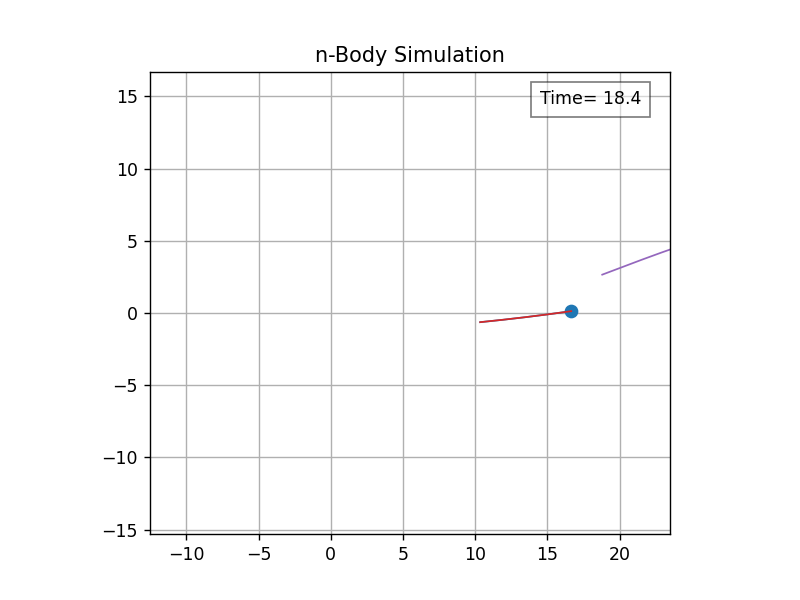

In [33]:
# creating space

fig=plt.figure()
ax=plt.axes(xlim=(-8,8),ylim=(-6,6))
ax.set_aspect("equal")

# creating points in space (feelin like god)

pts=[]
paths=[]
time = plt.text(0.75,0.96,"",horizontalalignment="left",verticalalignment="top",
                bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},transform=ax.transAxes) # show time
for i in range(0,nb):
    col=next(ax._get_lines.prop_cycler)['color']
    pts.append(plt.plot([],[], marker="o",color=col)[0])
    paths.append(plt.plot([],[],color=col,linewidth=1)[0])
    
def updt(i):
    ls=[] # list to be returned, containing all the pts
    
    # running loop for  every single particle (p reps a particle, i reps posn at some time)
    for p in range(0,nb):
        
            
        x,y=rec_posns[p][i]
        # for tail
        if i<5000:
            tail=i
        else:
            tail=5000
        px=[l[0] for l in rec_posns[p][i-tail:i]]
        py=[l[1] for l in rec_posns[p][i-tail:i]]
        
        pts[p].set_data([x],[y])
        pts[p].set_markersize(150*rec_rad[p][i]) # updating radius 

        paths[p].set_data([px],[py]) # comment this line for no path 
#        paths[p].set_linewidth(30*rec_rad[p][i])
        ls.append(paths[p]) # this too
        ls.append(pts[p])
    
    # Updating axes acc to CM
    Rx,Ry=Rs[i]
    ls[0].axes.set_xlim(Rx-18,Rx+18)
    ls[0].axes.set_ylim(Ry-16,Ry+16)
    
    # Updating time
    time.set_text("Time= {}".format(round(ts[i], 2)))
        
    return ls

anim = FuncAnimation(fig, updt, interval=10, blit=True, repeat=True, frames=np.arange(0,len(rec_posns[0]),100))
plt.title("n-Body Simulation")
plt.grid()
plt.show()


<IPython.core.display.Javascript object>


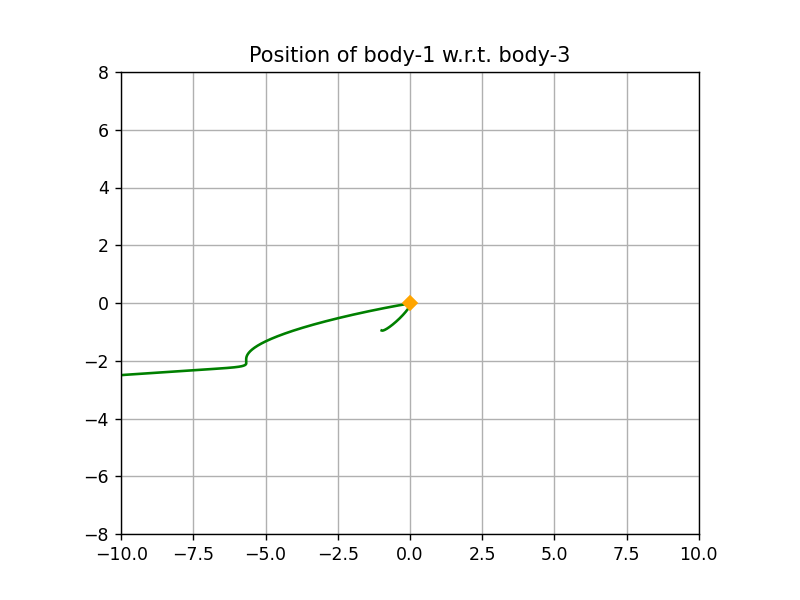

In [30]:
# Rel posn btw two specific bodies
i=3
j=1

r2fig=plt.figure()
r2ax=plt.axes(xlim=(-10,10),ylim=(-8,8))
r2ax.set_aspect("equal")

r2pt=plt.plot([],[], marker="o",color="green")
r2path=plt.plot([],[],color="green")
r2center=plt.plot(0,0, marker="D",color="orange")

rec_r2s=[]

for k in range(0,len(rec_posns[0])):
    rec_r2s.append((rec_posns[j][k]-rec_posns[i][k]).copy())

def r2updt(i):
    x,y=rec_r2s[i]
    px=[l[0] for l in rec_r2s[:i]]
    py=[l[1] for l in rec_r2s[:i]]
    r2pt[0].set_data([x],[y])
    r2path[0].set_data([px],[py])
    return r2pt, r2path

r2anim = FuncAnimation(r2fig, r2updt, interval=10, blit=True, repeat=True, frames=np.arange(0,len(rec_posns[0]),100))
plt.grid()
plt.title("Position of body-{} w.r.t. body-{}".format(j,i))
plt.show()


<IPython.core.display.Javascript object>


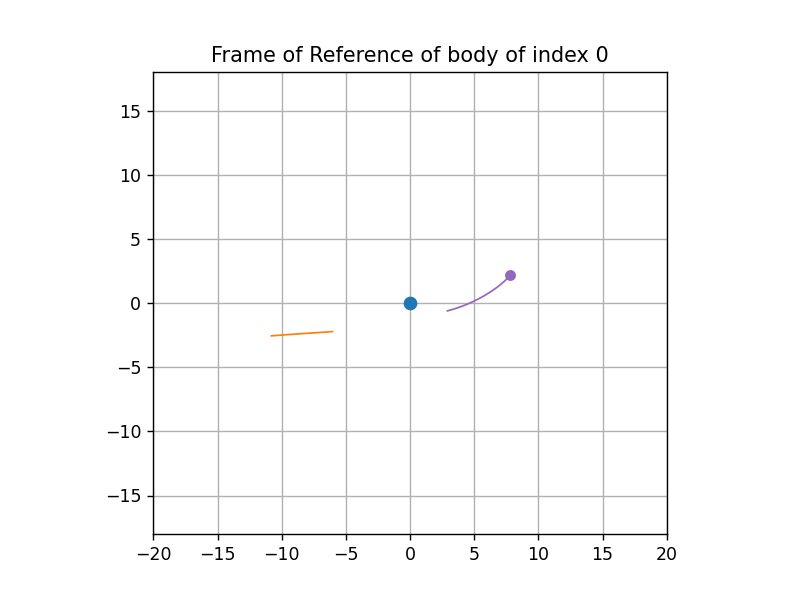

In [32]:
# in the frame of Reference of i'th body

ib=0

rfig=plt.figure()
rax=plt.axes(xlim=(-20,20),ylim=(-18,18))
rax.set_aspect("equal")

rpts=[]
rpaths=[]
#center=plt.plot(0,0,marker="D")
for i in range(0,nb):
    col=next(ax._get_lines.prop_cycler)['color']
    rpts.append(plt.plot([],[], marker="o",color=col))
    rpaths.append(plt.plot([],[],color=col,linewidth=1))

rec_rs=[[] for _ in range(0,nb)]
for k in range(0,len(rec_posns[0])):
    for j in range(0,nb):
            rec_rs[j].append((rec_posns[j][k]-rec_posns[ib][k]).copy())

def rupdt(i):
    ls=[] # list to be returned, containing all the pts
    
    # running loop for  every single particle (p reps a particle, i reps posn at some time)
    for p in range(0,nb):
             
        x,y=rec_rs[p][i]
        # for tail
        if i<5000:
            tail=i
        else:
            tail=5000
        px=[l[0] for l in rec_rs[p][i-tail:i]]
        py=[l[1] for l in rec_rs[p][i-tail:i]]
        
        rpts[p][0].set_data([x],[y])
        rpts[p][0].set_markersize(150*rec_rad[p][i]) # updating radius 

        rpaths[p][0].set_data([px],[py]) # comment this line for no path 
#        paths[p][0].set_linewidth(30*rec_rad[p][i])
        ls.append(rpaths[p][0]) # this too
        ls.append(rpts[p][0])

    return ls

ranim = FuncAnimation(rfig, rupdt, interval=10, blit=True, repeat=True, frames=np.arange(0,len(rec_posns[0]),100))
plt.grid()
plt.title("Frame of Reference of body of index {}".format(ib))
plt.show()


<IPython.core.display.Javascript object>


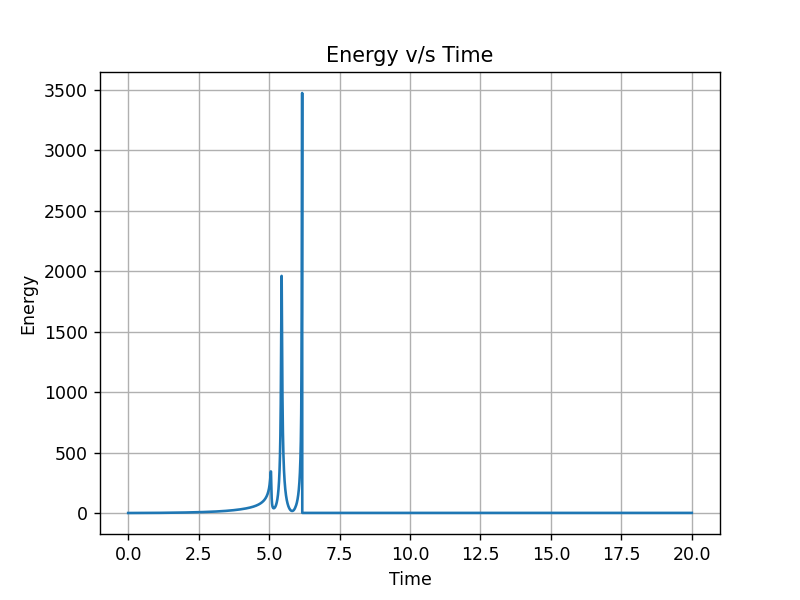

In [27]:
# Energy Considerations
# Potential Energy btw a and b
def uab(a,b,k,n):
    x=a-b
    r=(x[0]**2 + x[1]**2)**(1/2)
    u = k*r**(n+1)/(n+1)
    return u

# Kinetic Energy of a body
def kin(va,ma):
    v2=va[0]**2 + va[1]**2
    return 0.5*ma*v2

# Total Energy
Es=[]
for p in range(0,len(rec_posns[0])):
    e=0.0
    for i in range(0,nb):
        # for pot 
        u=0
        for j in range(0,nb):
            k=0.3*masses[i]*masses[j]
            if k == 0:
                continue
            #print(masses[i]*masses[j],p)
            if i!=j:
                u += uab(rec_posns[i][p],rec_posns[j][p],k,n)
        u=u/2 # since a pair is counted twice in the loop
        e+=u
        e += kin(rec_vels[i][p],masses[i])
        
    Es.append(e)

plt.plot(ts,Es)
plt.title("Energy v/s Time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.grid()
plt.show()


In [106]:
r2anim.save("rel posn in 3 body motion.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [124]:
anim.save("n-body coll100.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
